# Учимся работе с данными - от загрузки до моделирования

In [13]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(11)
# https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- radius_mean - mean of distances from center to points on the perimeter 
- texture_mean (standard deviation of gray-scale values) - стандартное отклонение значений яркости (gray-scale values) внутри изображения ядер.
    $$
    texture\_mean = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (I_i - \mu)^2}
    $$
    где:
    - $ I_i $ - значение яркости пикселя, 
    - $ \mu $ - среднее значение яркости, 
    - $ N $ - общее количество пикселей.

    Высокое значение часто указывает на неоднородную текстуру, характерную для злокачественных опухолей.
    Нузкое - на гладкие и равномерные клетки, более тепичные для доброкачественных опухолей.
- smoothness = локальная изменчивость (вариация) радиусов ядер относительно центра.
    * То есть, если представить ядро клетки как фигуру с центром, можно провести радиусы от центра до границы в разных направлениях.
    * Если длины радиусов почти одинаковые → контур гладкий, низкая smoothness.
    * Если радиусы сильно “скачут” (контур неровный, с зазубринами) → контур шероховатый, высокая smoothness.

- concavity (severity of concave portions of the contour) - Этот параметр описывает насколько сильно контур ядра клетки вогнутый — то есть насколько “впадины” (углубления) на границе клетки выражены.

In [14]:

data.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
# Пропуски данных
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

diagnosis - M(malignant), B(benign) - злокачественная и доброкачественная опухоли соответственно.

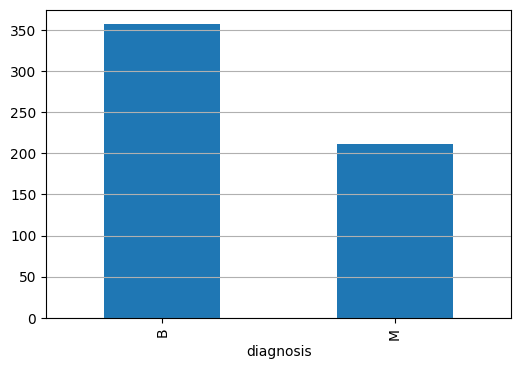

In [16]:
data['diagnosis'].value_counts().plot.bar(figsize=(6, 4))
plt.grid(axis='y')
plt.show()

## Анализируем данные

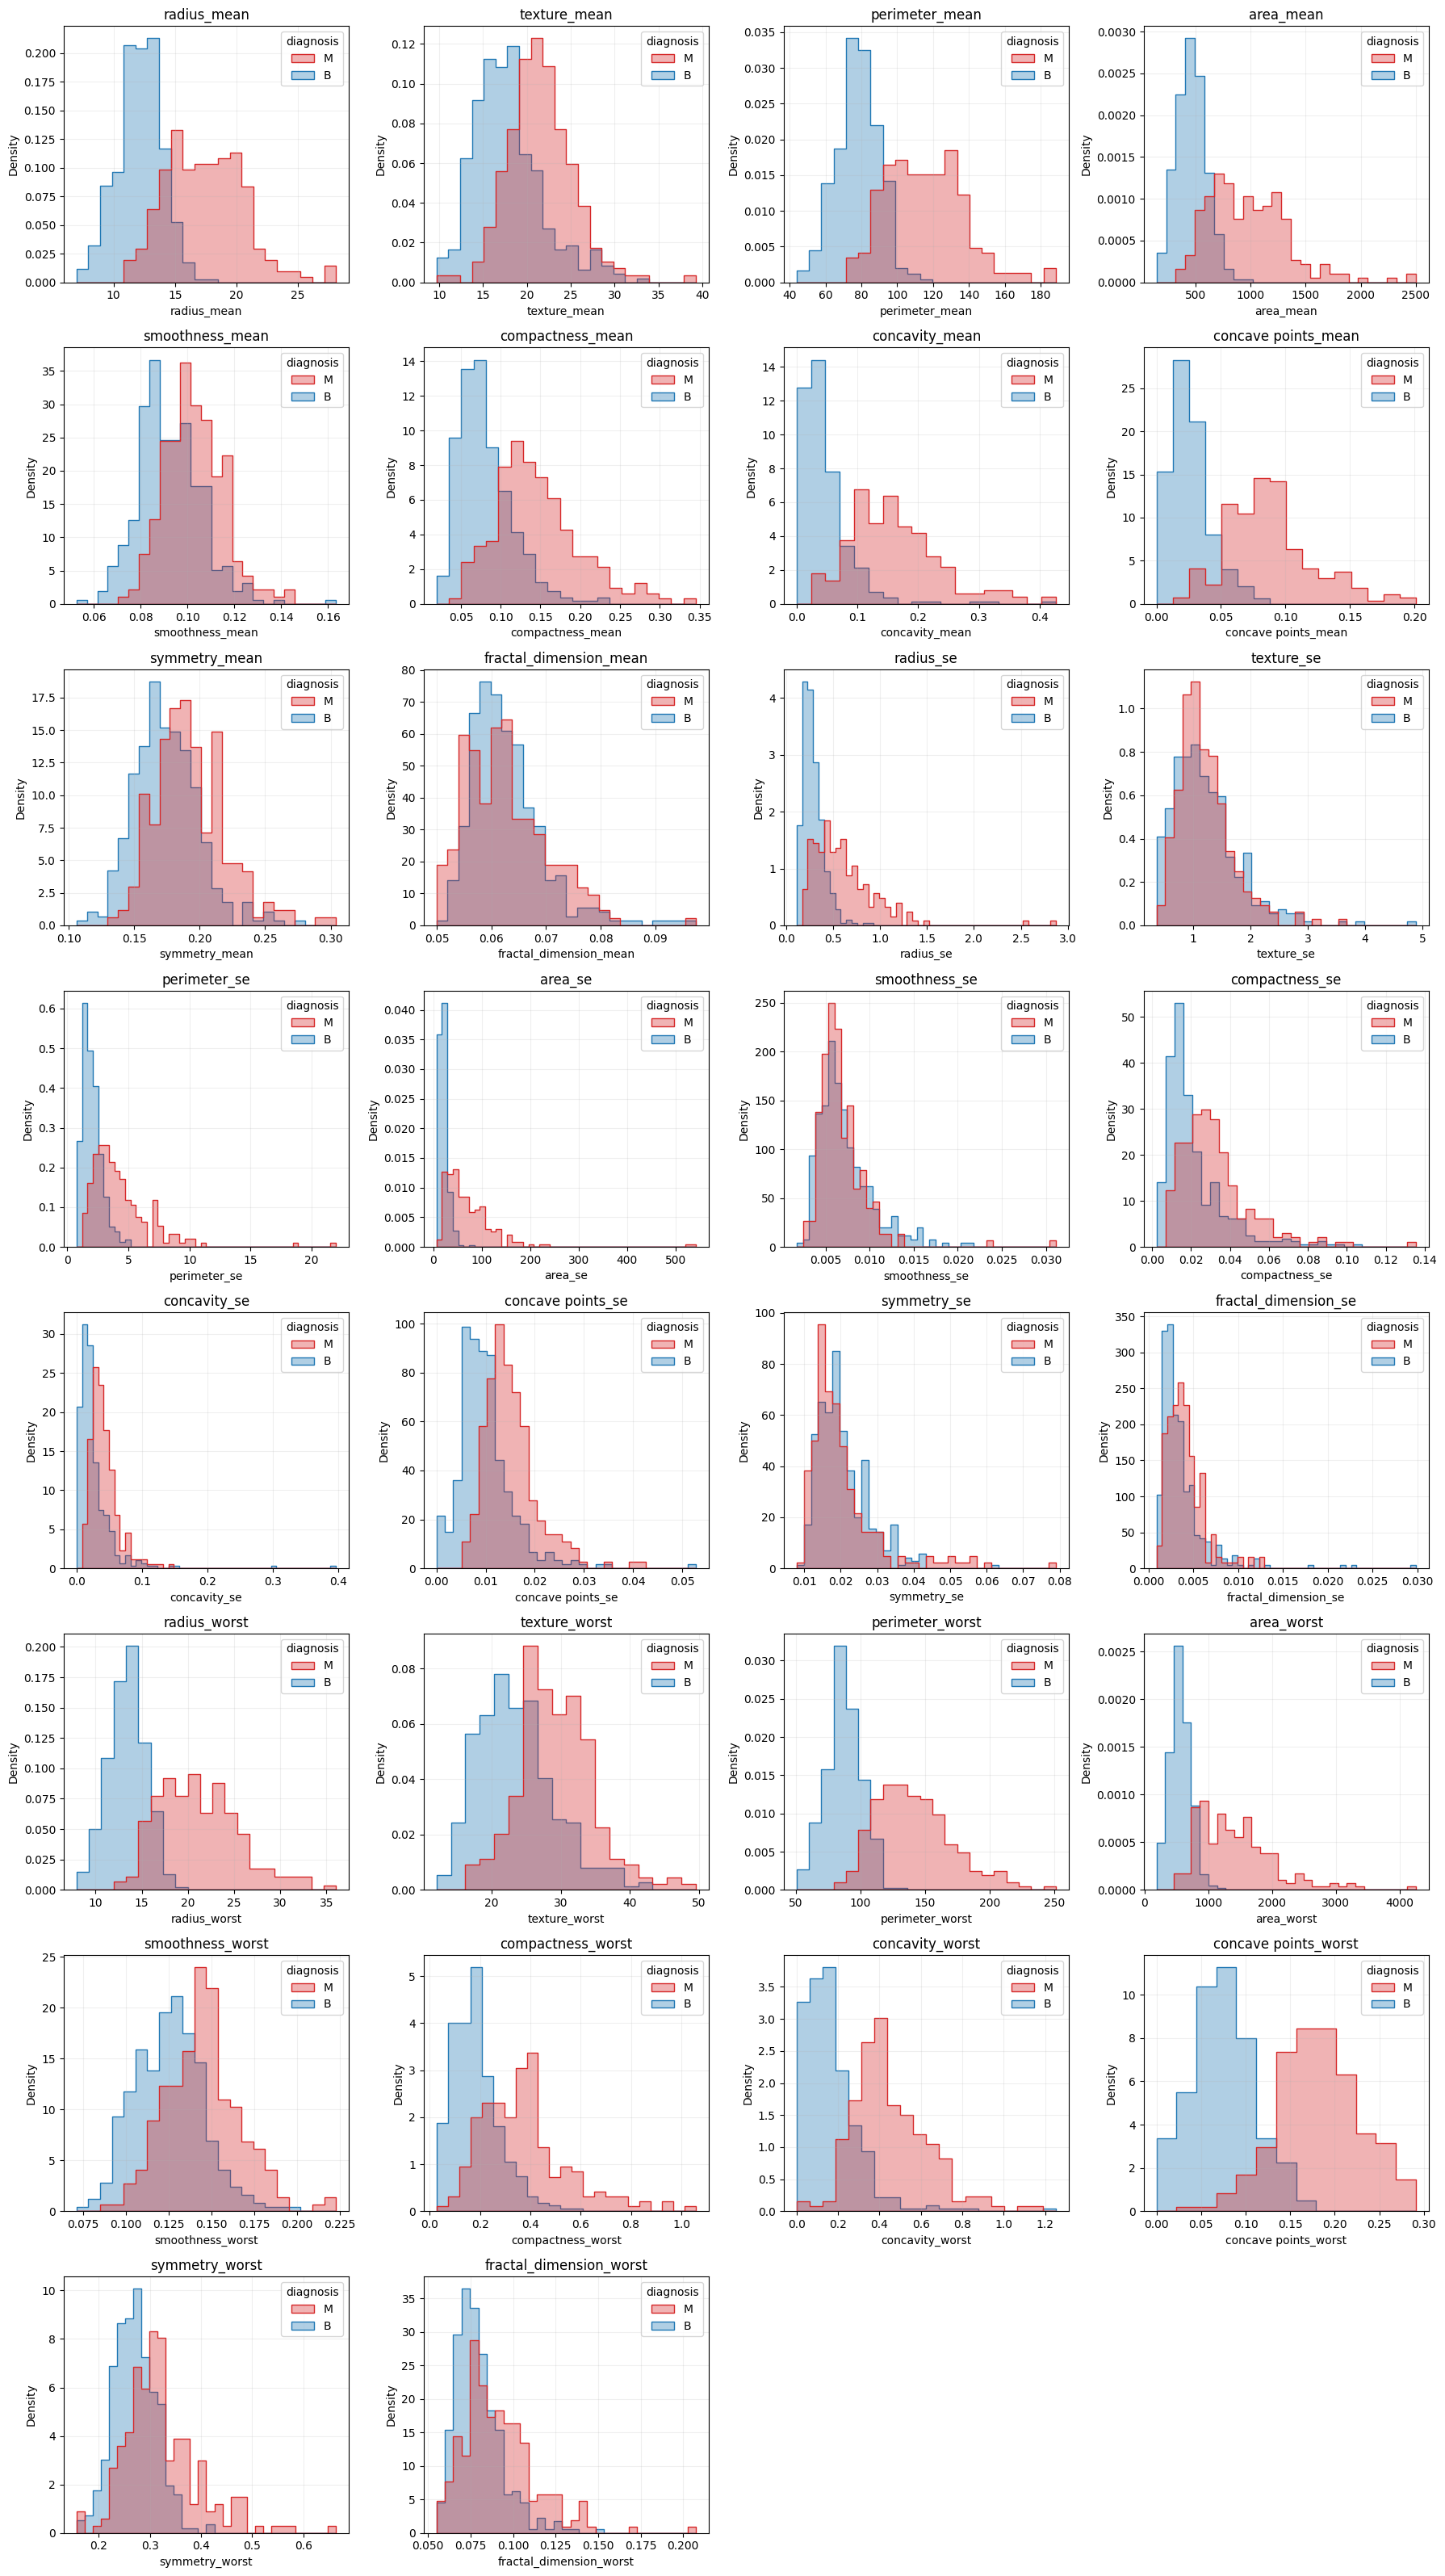

In [17]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")

target = "diagnosis"
ignore_cols = ["id", target]
feature_cols = [c for c in df.columns if c not in ignore_cols]

palette = {"M": "#d62728", "B": "#1f77b4"}
n_cols = 4
n_rows = math.ceil(len(feature_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharey=False)
axes = axes.ravel()

for ax, col in zip(axes, feature_cols):
    sns.histplot(
        data=df,
        x=col,
        hue=target,
        stat="density",
        common_norm=False,
        element="step",
        palette=palette,
        alpha=0.35,
        ax=ax,
    )
    ax.set_title(col)
    ax.grid(alpha=0.2)

for ax in axes[len(feature_cols):]:
    ax.set_visible(False)

plt.tight_layout()

Какие есть типы распределений?

- Одномодальное распределение - это когда данные имеют один явный пик (моду), указывающий на центральную тенденцию.
- Мультимодальное распределение - это когда распределение данных имеет несколько пиков (мод), что указывает на наличие нескольких подгрупп или кластеров внутри данных.
- Равномерное распределение - это когда все значения в наборе данных имеют примерно одинаковую частоту появления, без явных пиков или впадин.

Как анализировать?

Смотреть на степень пересечения признаков. Если почти не пересекаются, значит признак очень информативен. Если полностью совпадают - мало полезен. 

Выводы:

- radius_mean, area_mean, perimeter_mean:
    У злокачественных опухолей (M) значения выше, чем у доброкачественных (B).
    значит, крупные опухоли чаще злокачественные.

- concavity_mean, concave points_mean:
    Также сильно различаются.
    Злокачественные опухоли имеют более "неровные" или "вогнутые" контуры.

- texture_mean, smoothness_mean:
    Пересечение сильнее, значит эти признаки менее выразительны, но всё ещё могут помочь в модели.

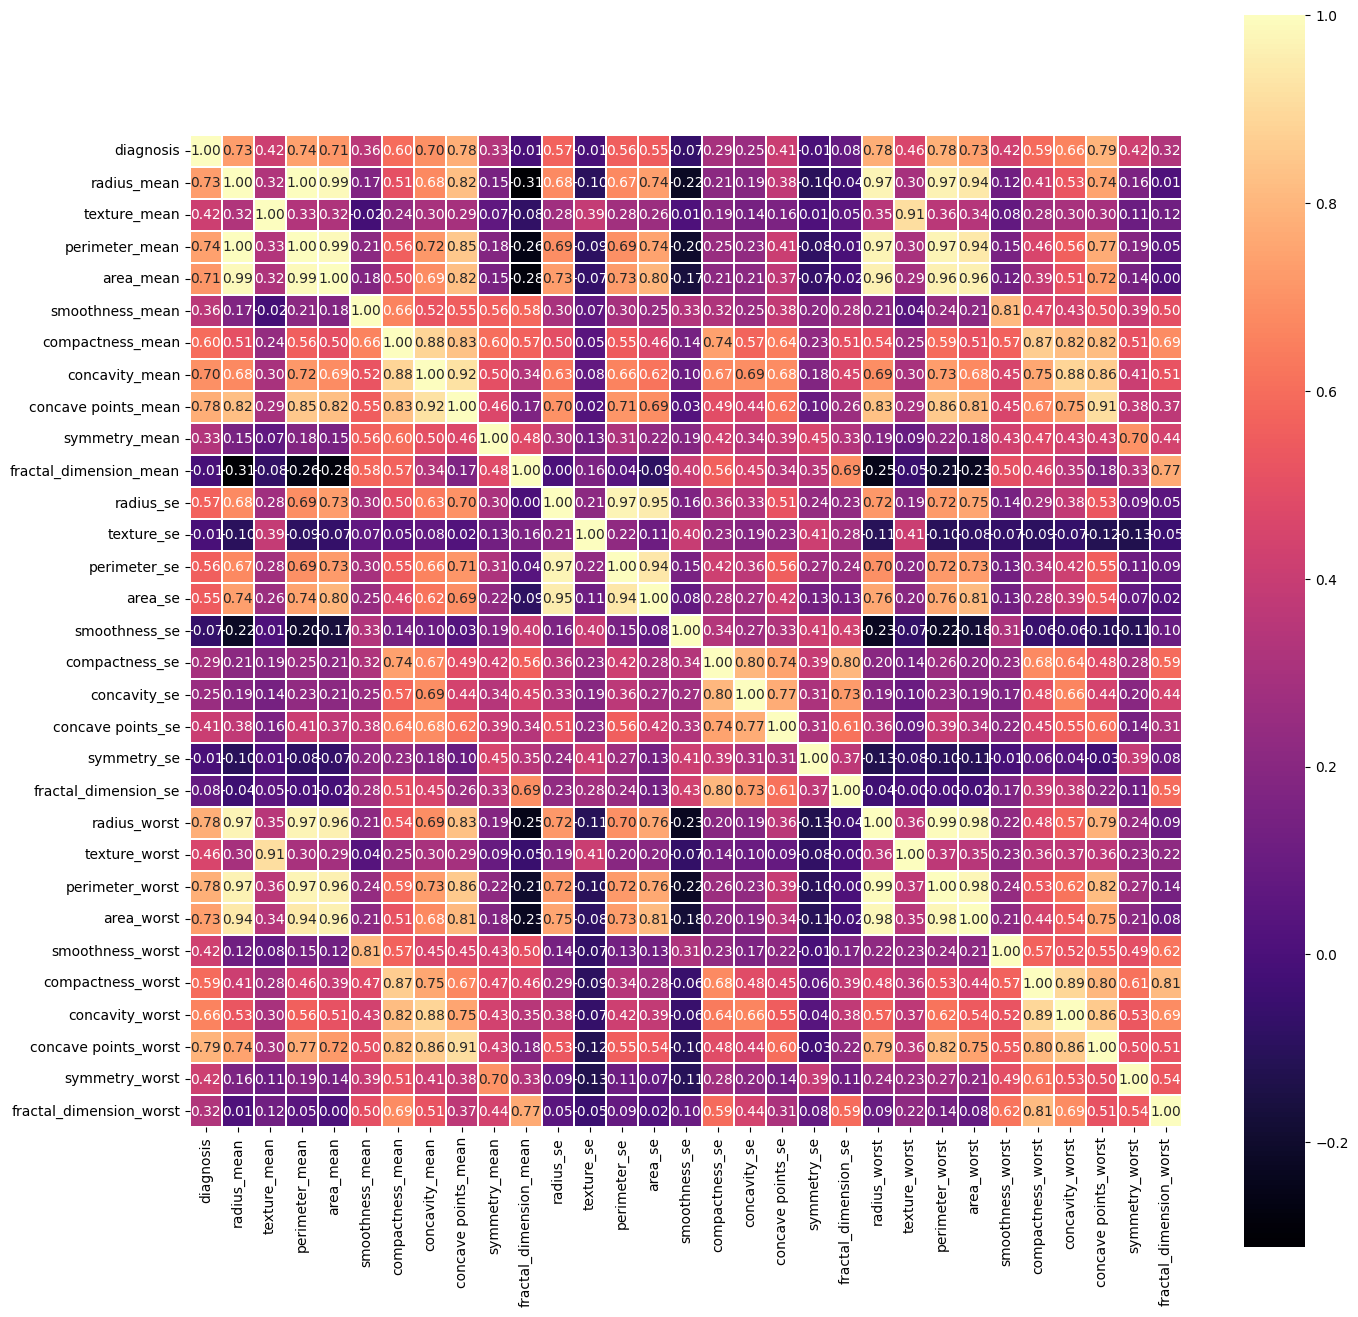

In [18]:
data = pd.read_csv("data.csv")
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data = data.drop(columns=['id'])
corr = data.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, cmap='magma', annot=True, square=True, cbar=True, linewidths=.1, fmt= '.2f')
plt.show()

# как можно расположить признаки с сильной корреляцией в одной области

Вывод 

### Много избыточных признаков.
Например, radius_mean, radius_worst и area_mean дают почти одинаковую информацию — можно оставить один.
Это важно при построении моделей вроде логистической регрессии или SVM, где мультиколлинеарность может мешать.

### Самые информативные признаки:

- radius_mean
- area_mean
- perimeter_mean
- concavity_mean
- concave points_mean
- radius_worst
- area_worst

Они лучше всего разделяют классы.

### Менее полезные признаки:

- fractal_dimension_*
- symmetry_*
- smoothness_se

Эти можно отбросить без заметной потери точности.

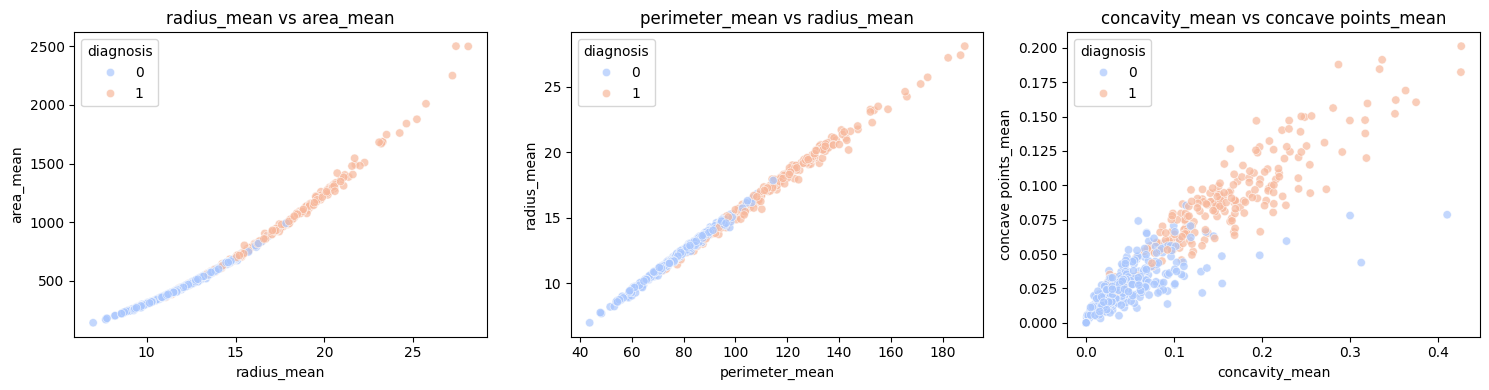

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Список пар сильно коррелированных признаков
pairs = [
    ('radius_mean', 'area_mean'),
    ('perimeter_mean', 'radius_mean'),
    ('concavity_mean', 'concave points_mean')
]

# Визуализация
plt.figure(figsize=(15, 4))

for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        hue='diagnosis',
        palette='coolwarm',
        alpha=0.7
    )
    plt.title(f'{x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)

plt.tight_layout()
plt.show()

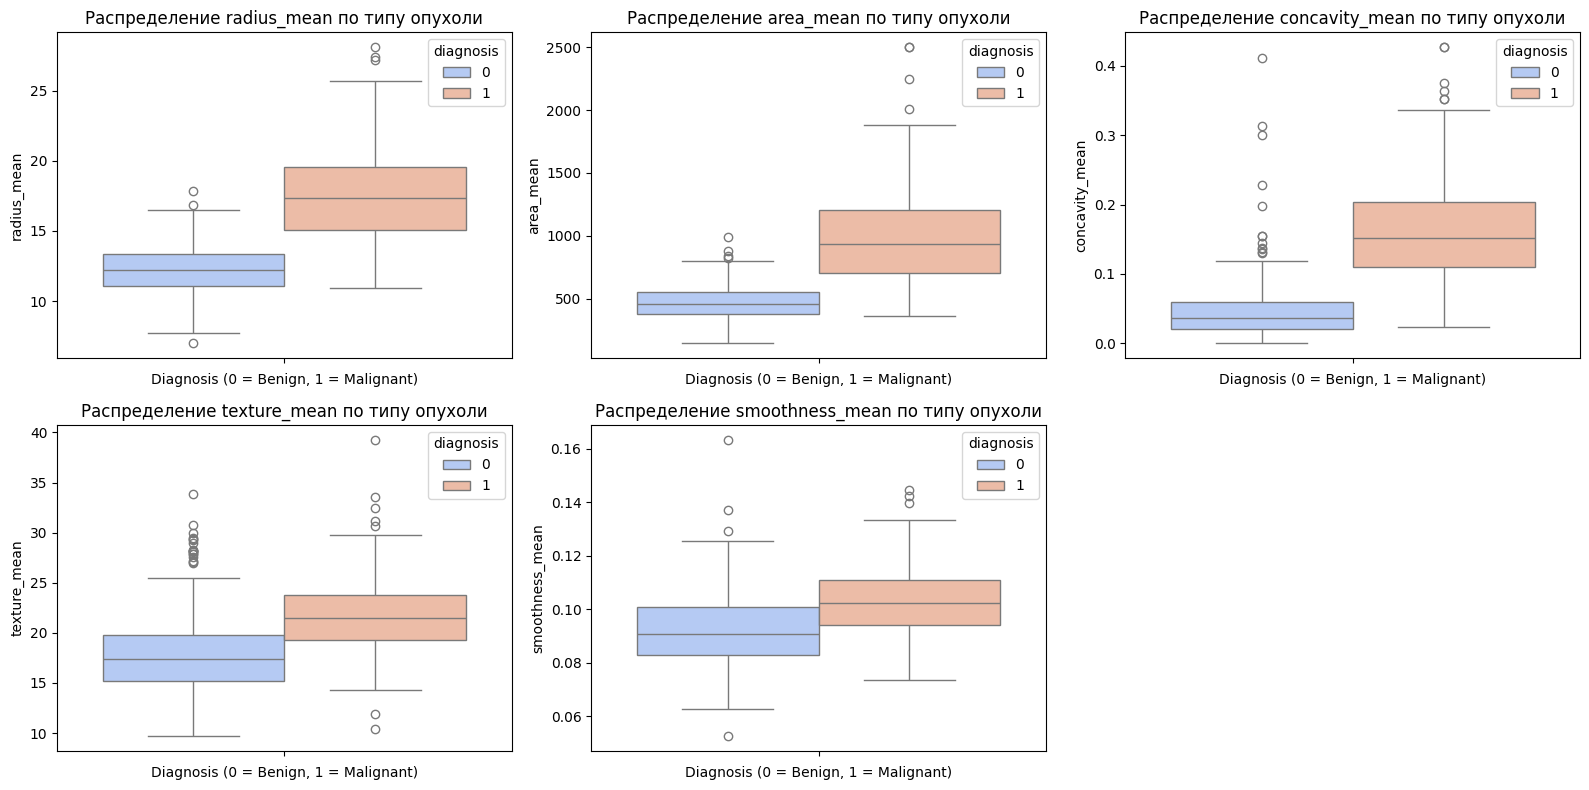

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Список признаков для сравнения
features = ['radius_mean', 'area_mean', 'concavity_mean', 'texture_mean', 'smoothness_mean']

plt.figure(figsize=(16, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        data=data,
        hue='diagnosis',
        y=feature,
        palette='coolwarm'
    )
    plt.title(f'Распределение {feature} по типу опухоли')
    plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Вывод 

Хорошо отделяемые признаки:
- radius_mean
- area_mean
- concavity_mean

In [21]:
# sns.pairplot(data, hue='diagnosis');

## Готовим train/test выборки

In [32]:
from sklearn.model_selection import train_test_split

# cols = ['radius_mean', 'area_mean', 'concavity_mean', 'texture_mean', 'smoothness_mean', 'diagnosis']
# data = data[cols].copy()

# stratify=data['diagnosis'] сохраняет пропорции diagnosis в разбиении
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.20, random_state=5, stratify=data['diagnosis']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

diagnosis
0    0.631579
1    0.368421
Name: proportion, dtype: float64

## Шкалируем признаки
kNN алгоритмы очень чувствительны к масштабу признаков. Если один признак имеет гораздо больший диапазон значений, чем другие, он будет доминировать при вычислении расстояний между точками.

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Начинаем обучать модели и оценивать качество

accuracy_train: 0.9516483516483516
accuracy_test: 0.9298245614035088
precision_train: 0.8941176470588236
precision_test: 0.8571428571428571
recall_train: 0.9743589743589743
recall_test: 0.9473684210526315
f1_score_train: 0.9325153374233128
f1_score_test: 0.9
roc_auc_score = 0.987


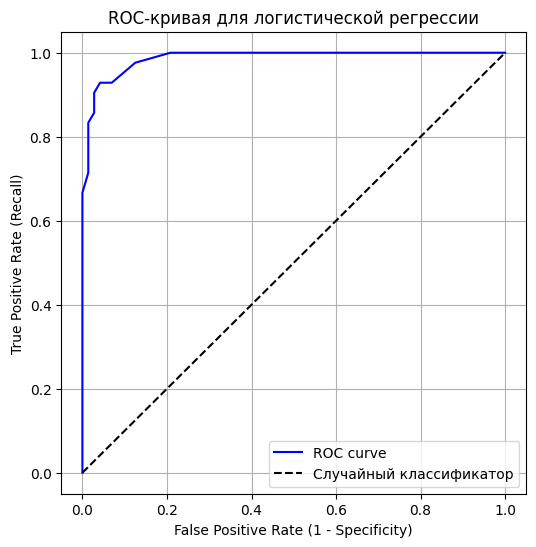

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
y_pred_train = knn.predict(X_train_scaled)
y_pred = knn.predict(X_test_scaled) # предсказываем на тестовых данных и сравниваем с тем что было подано на вход

# Accuracy показывает, какая доля предсказаний модели оказалась правильной.
# При дисбалансе классов может быть обманчивой. Например при значении 95 при общем количествое добракачественных опухалей 95%,
# модель может не уметь предсказывать злокачественные опухоли.
print(f"accuracy_train: {accuracy_score(y_pred_train, y_train)}")
print(f"accuracy_test: {accuracy_score(y_pred, y_test)}")

# Precision показывает, насколько уверенно модель предсказывает положительный класс.
# Когда опасно пропустить положительный случай.
print(f"precision_train: {precision_score(y_pred_train, y_train)}")
print(f"precision_test: {precision_score(y_pred, y_test)}")

# Recall показывает какую долю, из всех реально положительных объектов, модель смогла правильно обнаружить.
# Когда опасно ошибочно отметить отрицательный как положительный.
print(f"recall_train: {recall_score(y_pred_train, y_train)}")
print(f"recall_test: {recall_score(y_pred, y_test)}")

# f1-score. Компромисс между Precision и Recal. Для несбалансированных классов
print(f"f1_score_train: {f1_score(y_pred_train, y_train)}")
print(f"f1_score_test: {f1_score(y_pred, y_test)}")

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict_proba(X_test_scaled)[:, 1]
print(f'roc_auc_score = {roc_auc_score(y_test, y_pred):.3f}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC-кривая для логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_neighbors': range(1, 50),
        'weights' : ['uniform', 'distance']
}

knn = KNeighborsClassifier()

# grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1', verbose=1)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search.fit(X_train_scaled, y_train)

print("Best CV {} score: {:.3f}, best CV k: {}".format(grid_search.scoring,
    grid_search.best_score_, grid_search.best_estimator_.n_neighbors)
)

test_predictions = grid_search.best_estimator_.predict(X_test_scaled)
print("Resulting test f1 score: {:.3f}".format(f1_score(test_predictions, y_test)))
print(f'Best estimator: {grid_search.best_estimator_.weights}, N neighbours: {grid_search.best_estimator_.n_neighbors}')

Fitting 5 folds for each of 98 candidates, totalling 490 fits
Best CV roc_auc score: 0.985, best CV k: 17
Resulting test f1 score: 0.886
Best estimator: uniform, N neighbours: 17


## Линейная регрессия

accuracy train: 0.987
accuracy test:  0.991
precision:      1.000
recall:         0.976
f1_score:       0.988
ROC-AUC:        1.000


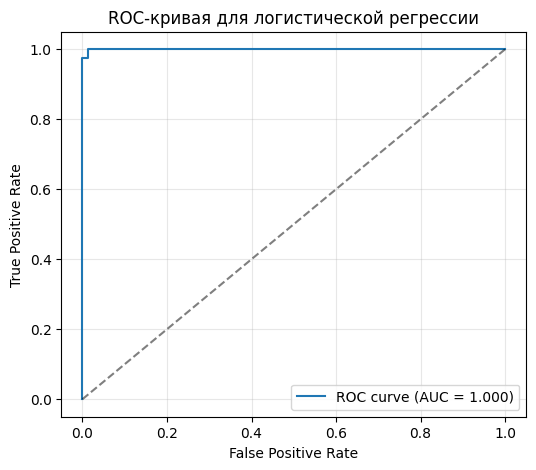

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)


cols = ['radius_mean', 'area_mean', 'concavity_mean', 'texture_mean', 'smoothness_mean', 'diagnosis']
data = data[cols].copy()

y = df['diagnosis'].map({'B': 0, 'M': 1})
X = df.drop(columns='diagnosis')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=5, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print(f"accuracy train: {accuracy_score(y_train, y_pred_train):.3f}")
print(f"accuracy test:  {accuracy_score(y_test, y_pred):.3f}")
print(f"precision:      {precision_score(y_test, y_pred):.3f}")
print(f"recall:         {recall_score(y_test, y_pred):.3f}")
print(f"f1_score:       {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC:        {roc_auc_score(y_test, y_proba):.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для логистической регрессии')
plt.legend()
plt.grid(alpha=0.3)
plt.show()



In [87]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# те же X_train_scaled, X_test_scaled, y_train, y_test

logreg_cv = LogisticRegressionCV(
    Cs=10,            # число кандидатов для C (либо список значений)
    cv=5,             # количество фолдов (меняй при необходимости)
    scoring='roc_auc',# оптимизируемая метрика
    penalty='l2',
    solver='liblinear',# удобен для небольших данных
    max_iter=500,
    random_state=5
)
logreg_cv.fit(X_train_scaled, y_train)

y_pred = logreg_cv.predict(X_test_scaled)
y_proba = logreg_cv.predict_proba(X_test_scaled)[:, 1]

print(f"Лучшее C: {logreg_cv.C_[0]:.4f}")
print(f"accuracy:  {accuracy_score(y_test, y_pred):.3f}")
print(f"precision: {precision_score(y_test, y_pred):.3f}")
print(f"recall:    {recall_score(y_test, y_pred):.3f}")
print(f"f1_score:  {f1_score(y_test, y_pred):.3f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_proba):.3f}")

Лучшее C: 0.0464
accuracy:  0.982
precision: 1.000
recall:    0.952
f1_score:  0.976
ROC-AUC:   0.998
